The main issue with ML is that the models are all the time overfitting and the big challenge is to make them *generalize* .  
*Generalization* refers to to how well the trained model performs on data it has never seen before . 

The thing is that we could not control generalization , we can only control the train data and the *optimization* of the model , which refers to the process of adjusting a model to get the best performance possible on the training data

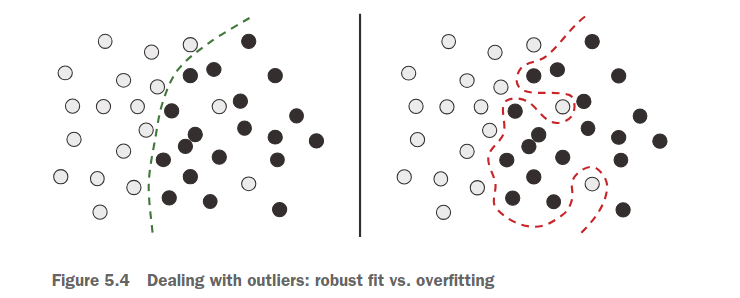  
Here is an example 

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In this example we will try to understand with 

In [2]:
(train_images,train_labels), _ = mnist.load_data()

#We reshape it to flatten the matrix for the NN
train_images = train_images.reshape((60000, 28*28))

#We normalize the values of every pixel to be between 0 and 1
train_images = train_images.astype("float32")/255

#We add a feature for every picture (new columns for every row)
noise = np.random.random((len(train_images),28*28))
train_images_with_noise = np.concatenate([train_images , noise], axis=1)

#We do the same operation but this time we fill it with zeros
zero_matrix = np.zeros((len(train_images), 784))
train_images_with_zeros = np.concatenate([train_images , zero_matrix], axis=1)


Let's create our neural network and train the model on these two differents datasets.  

Here we will use a new loss function called sparse categorical crossentropy. It's actually very similar , the main difference remains on the fact that for the *Categorical Crossentropy* the labels are one hot encoded.

Here is the formula :  
$$
L = - \sum_{j=1}^{C} y_j \cdot \log(\hat{y}_j)
$$

And for the Sparse Categorical Crossentropy the labels are *int*. So the formula is :  
$$
L = - \log(\hat{y}_{y})
$$

In [3]:
def build_model():
    model = Sequential(layers=[
        Dense(512,"relu"),
        Dense(10,"softmax")
    ])
    
    model.compile(
        optimizer='rmsprop',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

Here is the main steps for the trainning :
- Keras take 20% of the latest rows of x_train and x_target and categorize them as a validation set
- After every epoch , keras compute the loss and accuracy on the trainning set and then on the validation set.
- It repeats on every epoch

Why do I use batches ?  

It allows:  
- To make the gradient noisy and then avoid us to get stuck in a local minima.
- To use less memory and be quickest than the use of the whole batch

In [4]:
model_noisy = build_model()
history_noise = model_noisy.fit(
    train_images_with_noise,train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
) 

model_zeros = build_model()
history_zeros = model_zeros.fit(
    train_images_with_zeros, train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

2025-09-19 20:12:03.184886: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-09-19 20:12:03.184913: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-09-19 20:12:03.184917: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: pepito
2025-09-19 20:12:03.184919: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] hostname: pepito
2025-09-19 20:12:03.184966: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] libcuda reported version is: 550.163.1
2025-09-19 20:12:03.184977: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:194] kernel reported version is: 550.163.1
2025-09

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8119 - loss: 0.6244 - val_accuracy: 0.9058 - val_loss: 0.3043
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9219 - loss: 0.2543 - val_accuracy: 0.9356 - val_loss: 0.2088
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9482 - loss: 0.1680 - val_accuracy: 0.9463 - val_loss: 0.1786
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9621 - loss: 0.1217 - val_accuracy: 0.9618 - val_loss: 0.1318
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9722 - loss: 0.0894 - val_accuracy: 0.9580 - val_loss: 0.1395
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9793 - loss: 0.0651 - val_accuracy: 0.9563 - val_loss: 0.1501
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9841 - loss: 0.0493 - val_accuracy: 0.9660 - val_loss: 0.1182
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9891 - loss: 0.0358 - val_accuracy: 0.

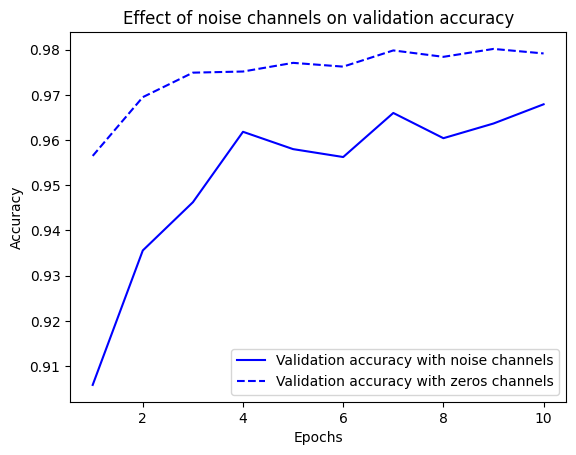

In [7]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']

epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


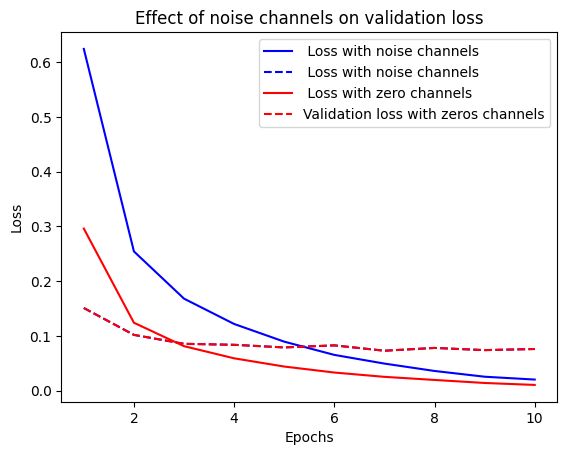

In [15]:
loss_noise = history_noise.history['loss']
val_loss_noise = history_zeros.history['val_loss']

loss_zeros = history_zeros.history['loss']
val_loss_zeros = history_zeros.history['val_loss']

epochs = range(1, 11)
plt.plot(epochs, loss_noise, "b-",
label=" Loss with noise channels")
plt.plot(epochs, val_loss_noise, "b--",
label=" Loss with noise channels")

plt.plot(epochs, loss_zeros, "r-",
label=" Loss with zero channels")
plt.plot(epochs, val_loss_zeros, "r--",
label="Validation loss with zeros channels")

plt.title("Effect of noise channels on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()



*Conclusion*:

Despite the data holding the same information in both cases, the validation accuracy
of the model trained with noise channels is lower than the other one.
Noisy features inevitably lead to overfitting.

<u>*A little bit of theory*</u>

<u>*Manifold theory*</u>:

- A *manifold* is a tiny subspace of the parent space which localy linear.  
For the us , if we slightly modify a MNSIT picture it will be still recognizable  

- All samples in the valid subspace are connected by smooth paths that run through the subspace.  
This means that if you take two random MNIST digits A and B, there exists a sequence of “intermediate” images
that morph A into B, such that two consecutive digits are very close to each other

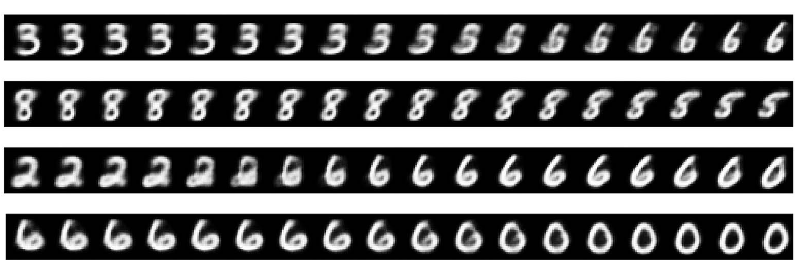

<u> Why do I have to split the data into a validation and test set ?</u>

The reason is that when we train your model you want to *tune* some *hyperparameters* (number of layers or size of the layer for example) which are different than the parameters, which are the network’s
weights.  

We do this tuning by using as a feedback signal the performance of the
model on the validation data

Let’s review three classic evaluation recipes: 
1) Simple holdout validation
2) K-fold validation
3) Iterated K-fold validation with shuffling

<u>*1) Simple holdout validation*</u>

We just set apart some fraction of our date (10% for example) and then evaluate it on this and tune the hyperparameters.

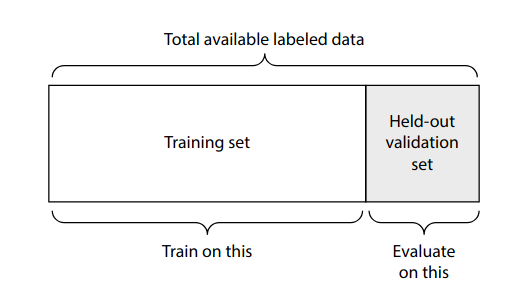  

The issue is that it contain too few samples to be statisti-cally representative of the data at hand.  
K-fold validation and iterated
K-fold validation are two ways to address this

<u>*2) K-Fold validation*</u>
- We split the data into K partitions of equal size.  
- For each partition i, train a model on the remaining K - 1 partitions, and evaluate it on partition i.
- The final score is then the averages of the K scores obtained.

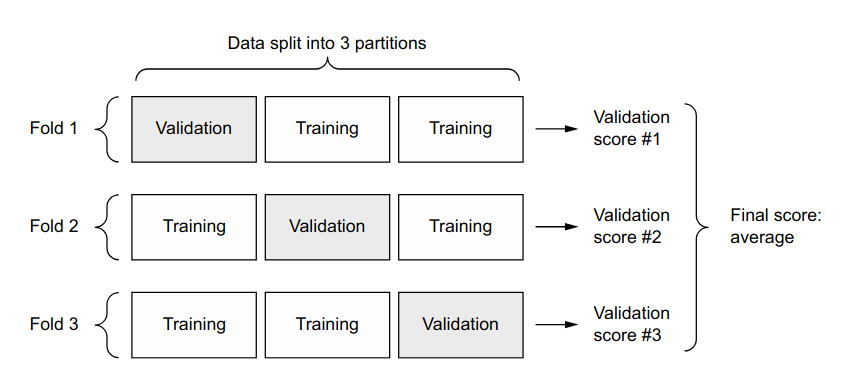

<u>*3) Iterated K-Fold validation*</u>  
This one is for situations in which we have relatively little data available and we need  
to evaluate our model as precisely as possible

It consists of applying K-fold validation multiple times, shuffling  
the data every time before splitting it K ways. The final score is the average of the  
scores obtained at each run of K-fold validation. Note that we end up training and  
evaluating P * K models (where P is the number of iterations we use),

*How to tackle a ML problem ?*  

The main goal will be to find a model/NN that at first shows the capacity of generalization and then of overfitting . 

This can be found by looking at the validation loss . If it's goes down quickly and then increases without explanation , you just find a good model 

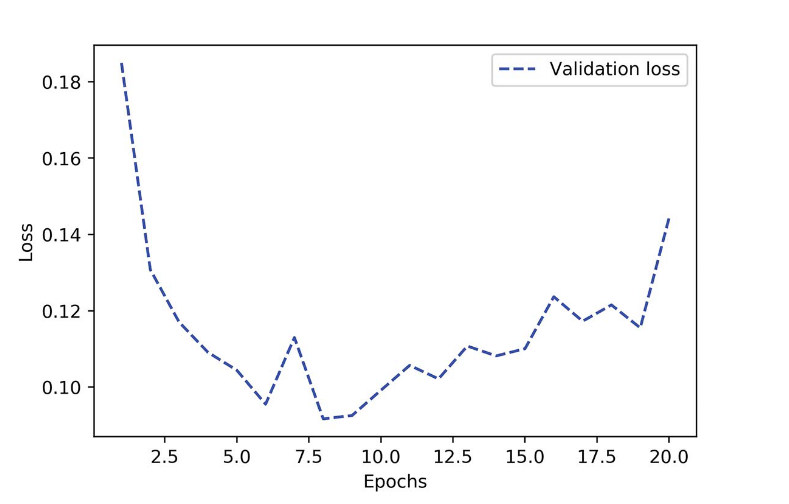

*How can I make my model generalize well *

- Try to have the maximum of different data (dense sampling)
- Minimize labeling errors
- Clean the data and deal good with missing values
- Do some *features engineering*

<u>*Regularization*</u>  

- A simple model is a model where the distribution of parameter values has less entropy . We want to force the model's weights to take only small values which makes the distribution of weight values more regular.   

- This is called *weight regularization*, and it’s done by adding to the loss function of the model a cost associated with having large weights.

There is two types of *regularization*:

1) L1 (Lasso):  $J(\theta) = \text{Loss}(\theta) + \lambda \sum_{j=1}^p |\theta_j|$  
- It makes some weights to 0 what allows us to do some automatic features selection

2) L2 (Ridge):  $J(\theta) = \text{Loss}(\theta) + \lambda \sum_{j=1}^p \theta_j^2$
- It makes some wieghts converging to 0 without being actually equal to 0
